# Baseline Prediction Model

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-Modules:" data-toc-modified-id="Import-Modules:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import Modules:</a></span></li><li><span><a href="#Import-Data:" data-toc-modified-id="Import-Data:-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import Data:</a></span></li><li><span><a href="#Set-up-Model:" data-toc-modified-id="Set-up-Model:-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Set up Model:</a></span></li><li><span><a href="#Fit-Model:" data-toc-modified-id="Fit-Model:-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Fit Model:</a></span></li><li><span><a href="#Save-the-Model:" data-toc-modified-id="Save-the-Model:-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Save the Model:</a></span></li><li><span><a href="#Analyse-Model:" data-toc-modified-id="Analyse-Model:-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Analyse Model:</a></span></li><li><span><a href="#Round-continous-distribution-to-only-interger-values:" data-toc-modified-id="Round-continous-distribution-to-only-interger-values:-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Round continous distribution to only interger values:</a></span></li><li><span><a href="#Analyse-Classification-Scores:" data-toc-modified-id="Analyse-Classification-Scores:-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Analyse Classification Scores:</a></span></li></ul></div>

### Import Modules:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

plt.style.use('fivethirtyeight')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
from sklearn.linear_model import PoissonRegressor
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, make_scorer

import scikitplot as skplt

### Import Data:

In [3]:
# Filepaths / names:
y1_train_file = '../Data/y1_train_clean_processed.csv'
y1_test_file = '../Data/y1_test_clean_processed.csv'
X1_train_file = '../Data/X1_train_clean_processed.csv'
X1_test_file = '../Data/X1_test_clean_processed.csv'

In [4]:
y1_train = pd.read_csv(y1_train_file)

In [5]:
y1_test = pd.read_csv(y1_test_file)

In [6]:
X1_train = pd.read_csv(X1_train_file)

In [7]:
X1_test = pd.read_csv(X1_test_file)

### Set up Model:

In [8]:
model1 = PoissonRegressor(fit_intercept=True,verbose=2)

### Fit Model:

In [9]:
model1.fit(X1_train,y1_train)

C:\Users\jackh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


PoissonRegressor(verbose=2)

### Save the Model:

In [10]:
joblib.dump(model1, '../Model_Save_Files/Poisson_Regressor_Model_1.jlib')

['../Model_Save_Files/Poisson_Regressor_Model_1.jlib']

### Analyse Model:

In [11]:
model1.get_params()

{'alpha': 1.0,
 'fit_intercept': True,
 'max_iter': 100,
 'tol': 0.0001,
 'verbose': 2,
 'warm_start': False}

In [12]:
pred1 = model1.predict(X1_test)

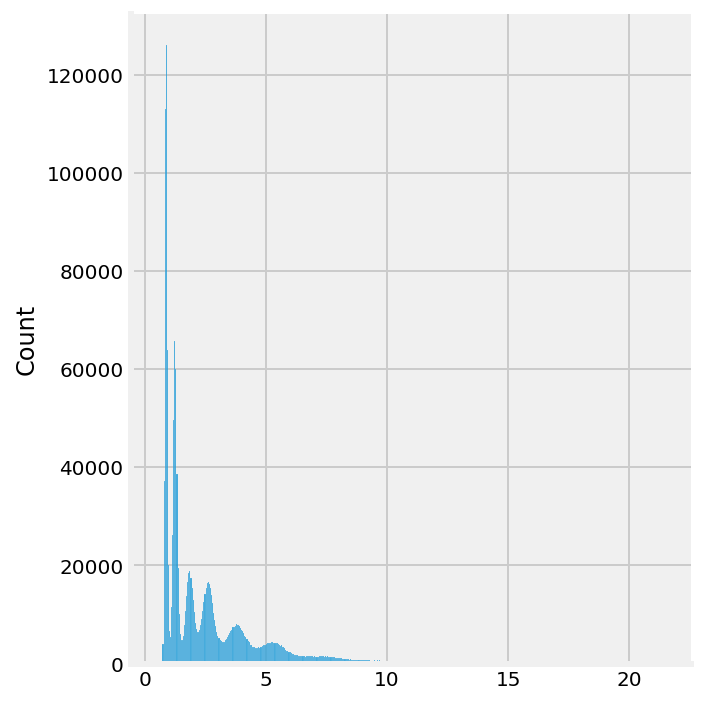

In [13]:
sns.displot(pred1)
plt.show()

### Round continous distribution to only interger values:

In [14]:
pred1_rounded = np.around(pred1, decimals=0, out=None)

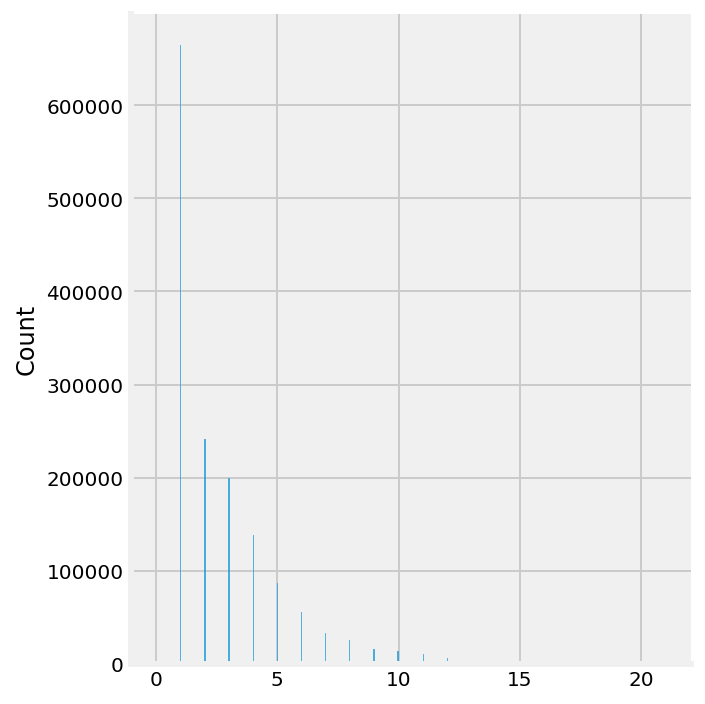

In [15]:
sns.displot(pred1_rounded)
plt.show()

In [16]:
def rounding_accuracy_score(y_true,y_pred):
    return accuracy_score(y_true,np.around(y_pred,decimals=0))

### Analyse Classification Scores:

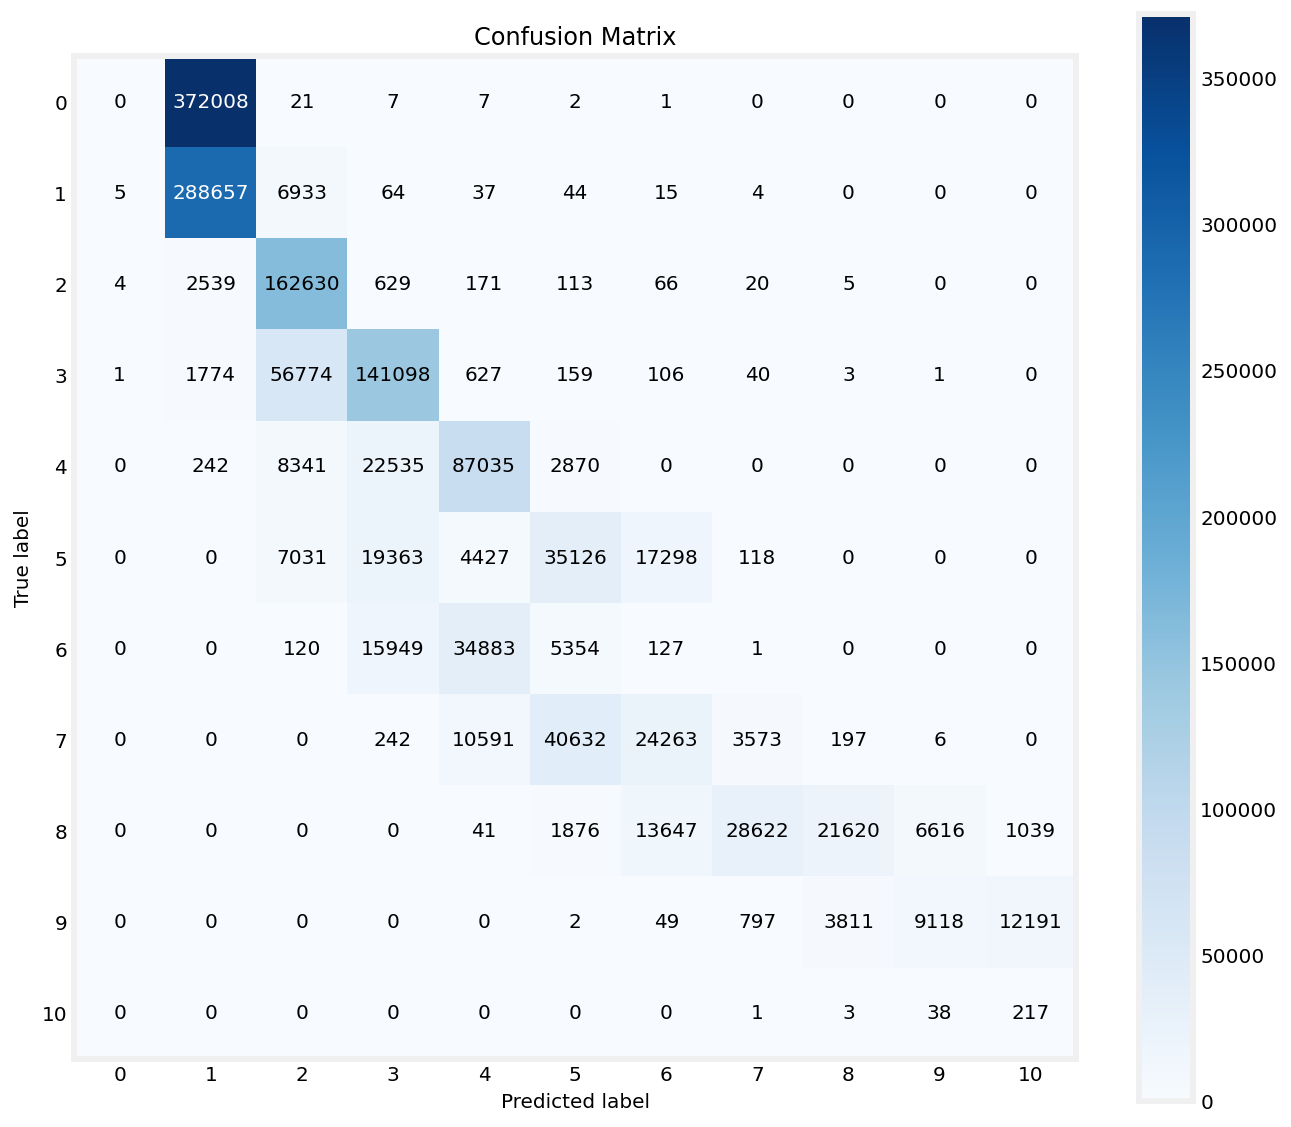

In [17]:
# Confusion Matrix
predictions_test1 = np.around(model1.predict(X1_test), decimals=0, out=None)

skplt.metrics.plot_confusion_matrix(y1_test,predictions_test1,labels=[0,1,2,3,4,5,6,7,8,9,10],figsize=(10,10))
plt.show()

In [18]:
# Cross Validation Score
cvs1 = cross_val_score(model1, X1_test, y1_test, cv=5,scoring=make_scorer(rounding_accuracy_score,greater_is_better=True))
print(cvs1.mean())

C:\Users\jackh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\jackh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\jackh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\jackh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

0.49931000000000003


In [19]:
# Accuracy, Precision and Recall
predictions_train1 = np.around(model1.predict(X1_train), decimals=0, out=None)

print(classification_report(y1_train, predictions_train1))
print(classification_report(y1_test, predictions_test1))

C:\Users\jackh\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       0.14      0.00      0.00    868106
         1.0       0.43      0.98      0.60    690106
         2.0       0.67      0.98      0.80    387747
         3.0       0.70      0.70      0.70    468026
         4.0       0.63      0.72      0.67    282387
         5.0       0.41      0.42      0.41    194514
         6.0       0.00      0.00      0.00    131678
         7.0       0.11      0.05      0.06    185511
         8.0       0.84      0.29      0.43    171628
         9.0       0.58      0.23      0.32     95284
        10.0       0.02      0.02      0.02     25013
        11.0       0.00      0.00      0.00         0
        12.0       0.00      0.00      0.00         0
        13.0       0.00      0.00      0.00         0
        14.0       0.00      0.00      0.00         0
        15.0       0.00      0.00      0.00         0
        16.0       0.00      0.00      0.00         0
        17.0       0.00    